In [484]:
# importando las librerias 

#limpieza y transformacion de datos
import pandas as pd
import numpy as np
import janitor
import missingno

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

### Set de estilo de los graficos 

In [533]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (12, 9.4)

### Cargando los datos 

In [486]:
df = (
    pd.read_csv("/home/astin/Documents/MypythonBriefcase/visual/job_test/BI_analyst/data/raw/BIChallenge_Templaris - BusinessBIBA_Challenge.csv") 
)

### Conociendo los datos 

In [487]:
df.describe()


,Unnamed: 0,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
mean,6377.500000,2516.923330,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,3682.484352,1465.606943,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,0.000000,1.000000,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,3188.750000,1204.000000,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,6377.500000,2571.000000,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,9566.250000,3801.000000,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000
max,12755.000000,4999.000000,49.000000,108300.000000,49.000000,412498.523200,64000.000000,5.000000


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


In [491]:
df.shape

(12756, 11)

### ELiminando la columa Unnamed

In [492]:
df.drop(columns='Unnamed: 0', inplace=True)


### Tenemos datos faltantes 

In [493]:
(
    df
    .isnull()
    .any()
)

ID                False
UPDATE            False
STATUS             True
MOTIVE             True
INTEREST_RATE      True
AMOUNT             True
CAT                True
TXN                True
CP                 True
DELIVERY_SCORE     True
dtype: bool

### Cuantos datos faltantes tenemos 

In [494]:
(
    df
    .isnull()
    .sum()
)

ID                    0
UPDATE                0
STATUS             4816
MOTIVE            10458
INTEREST_RATE     11251
AMOUNT            11251
CAT               11251
TXN                8983
CP                11710
DELIVERY_SCORE    11710
dtype: int64

In [495]:
(
    df
    .isnull()
    .sum()
    .sum()
)

81430

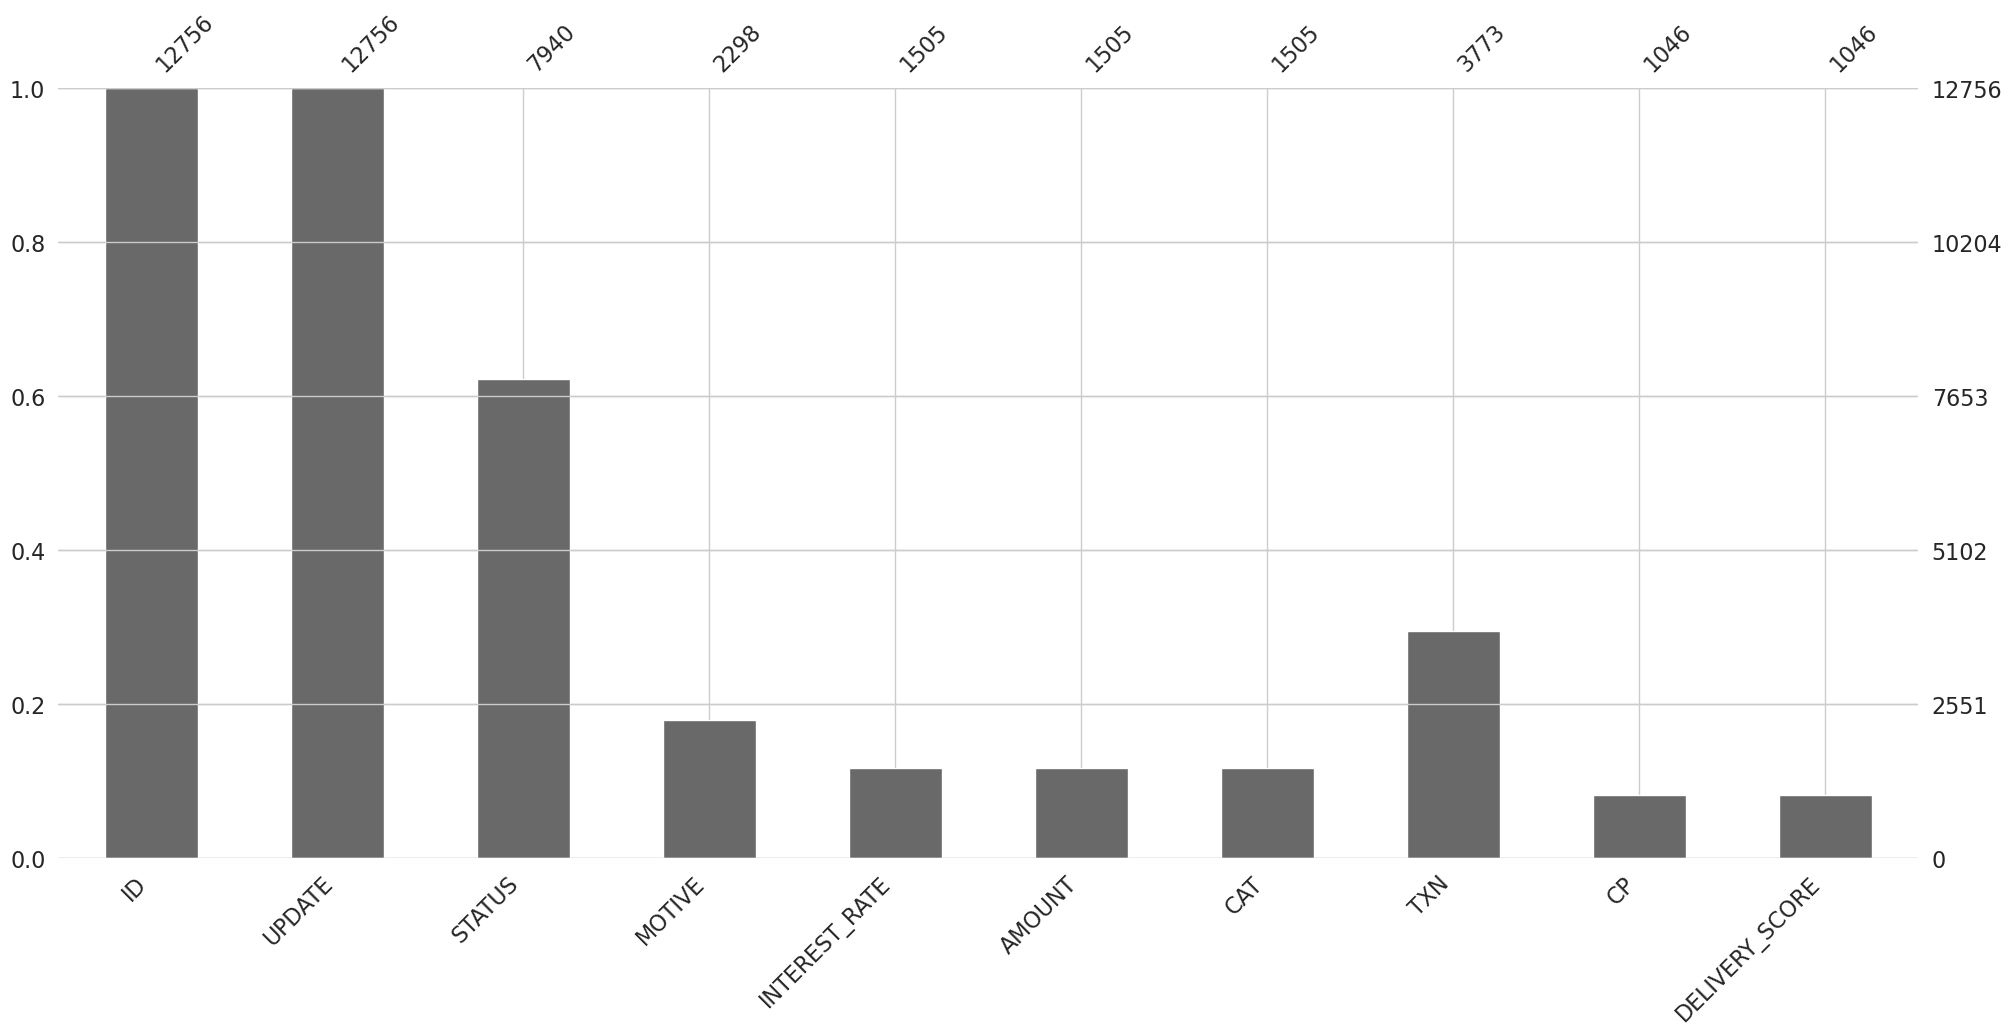

In [496]:
(
    missingno.bar(df=df)
);

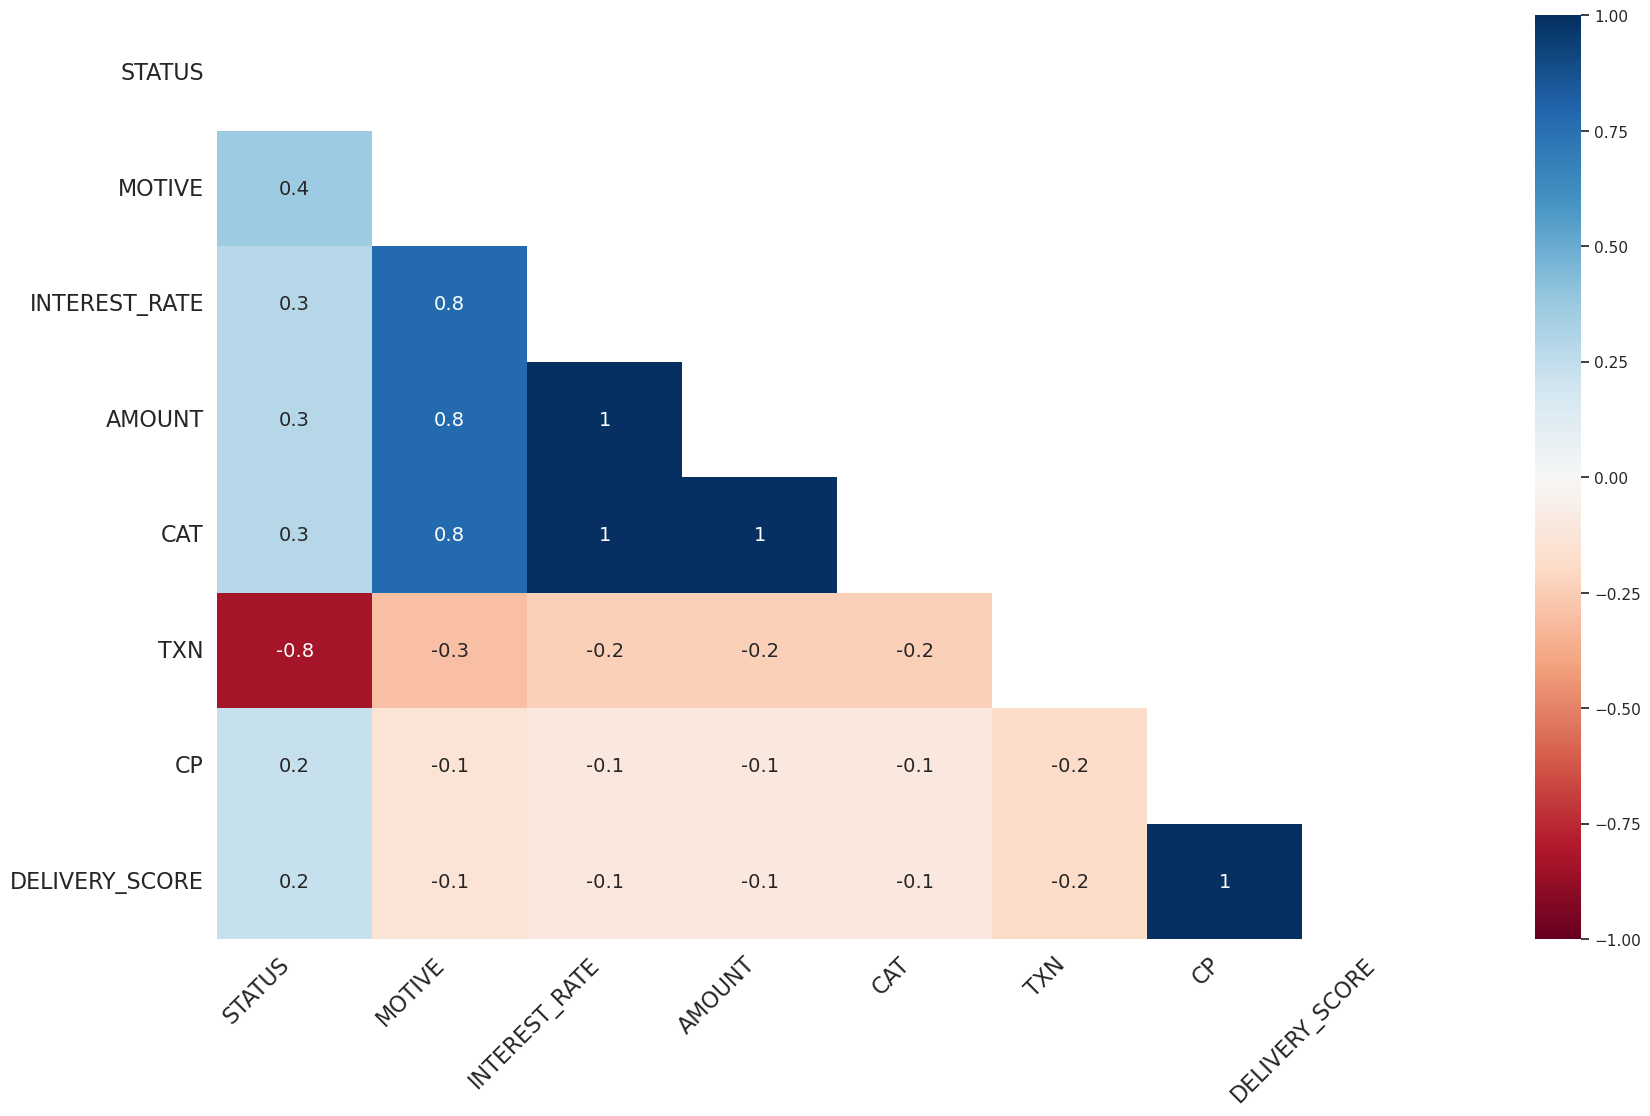

In [497]:
(
    missingno.heatmap(df=df)
);

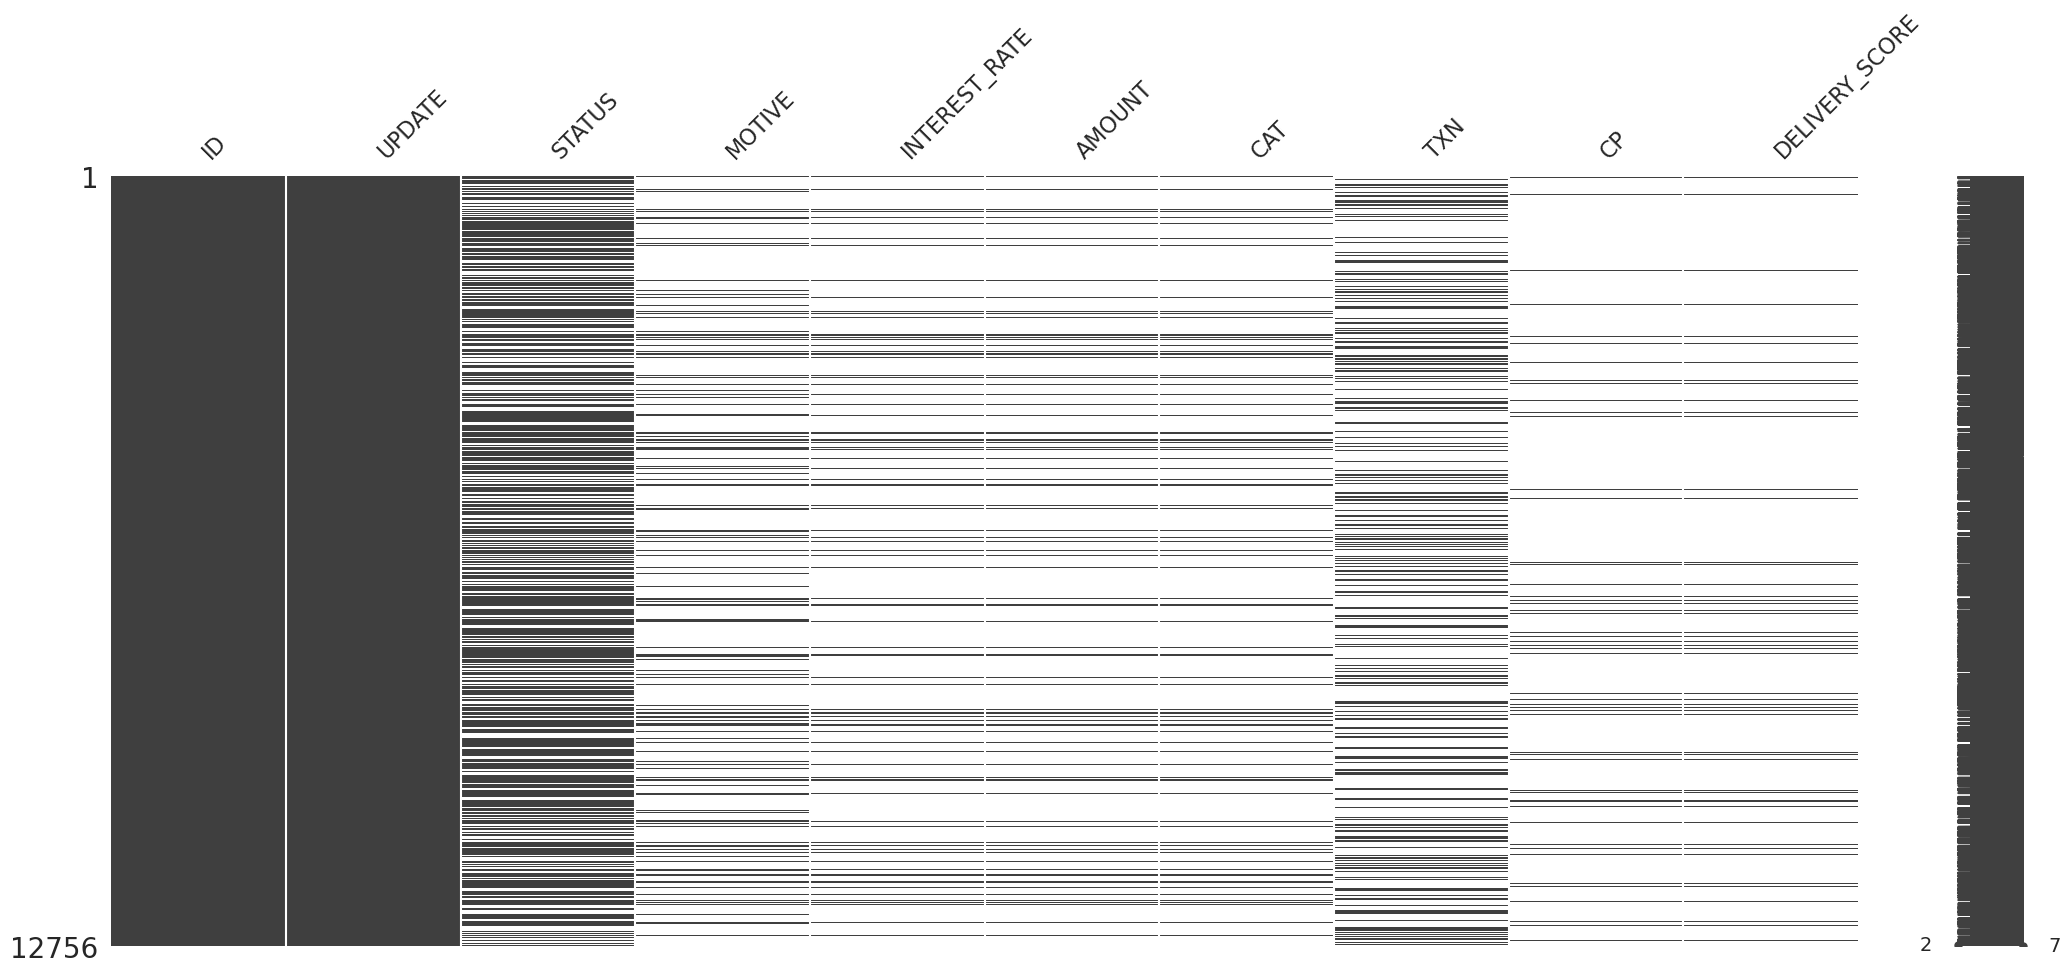

In [498]:
(
    missingno.matrix(df=df)
);

In [499]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Manejo de Datos faltantes implicitos y Explicitos 

In [500]:
for indice_fila, fila in df.iterrows():
    if pd.isna(fila['STATUS']) and pd.notna(fila['TXN']):
        df.at[indice_fila, 'STATUS'] = "TRANSACTION"

In [501]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,TRANSACTION,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
(
    df.STATUS.fillna('UNANSWERED',inplace=True)
)

In [503]:
(
    df.MOTIVE.fillna('DENIED',inplace=True)
)

In [504]:
(
    df.INTEREST_RATE.fillna(0,inplace=True)
)

In [505]:
(
    df.AMOUNT.fillna(0,inplace=True)
)

In [506]:
(
    df.CAT.fillna(0,inplace=True)
)

In [507]:
(
    df.TXN.fillna(0,inplace=True)
)

In [508]:
(
    df.CP.fillna(0,inplace=True)
)

In [509]:
(
    df.DELIVERY_SCORE.fillna(0,inplace=True)
)

### Verificando la limpieza de los datos faltantes 

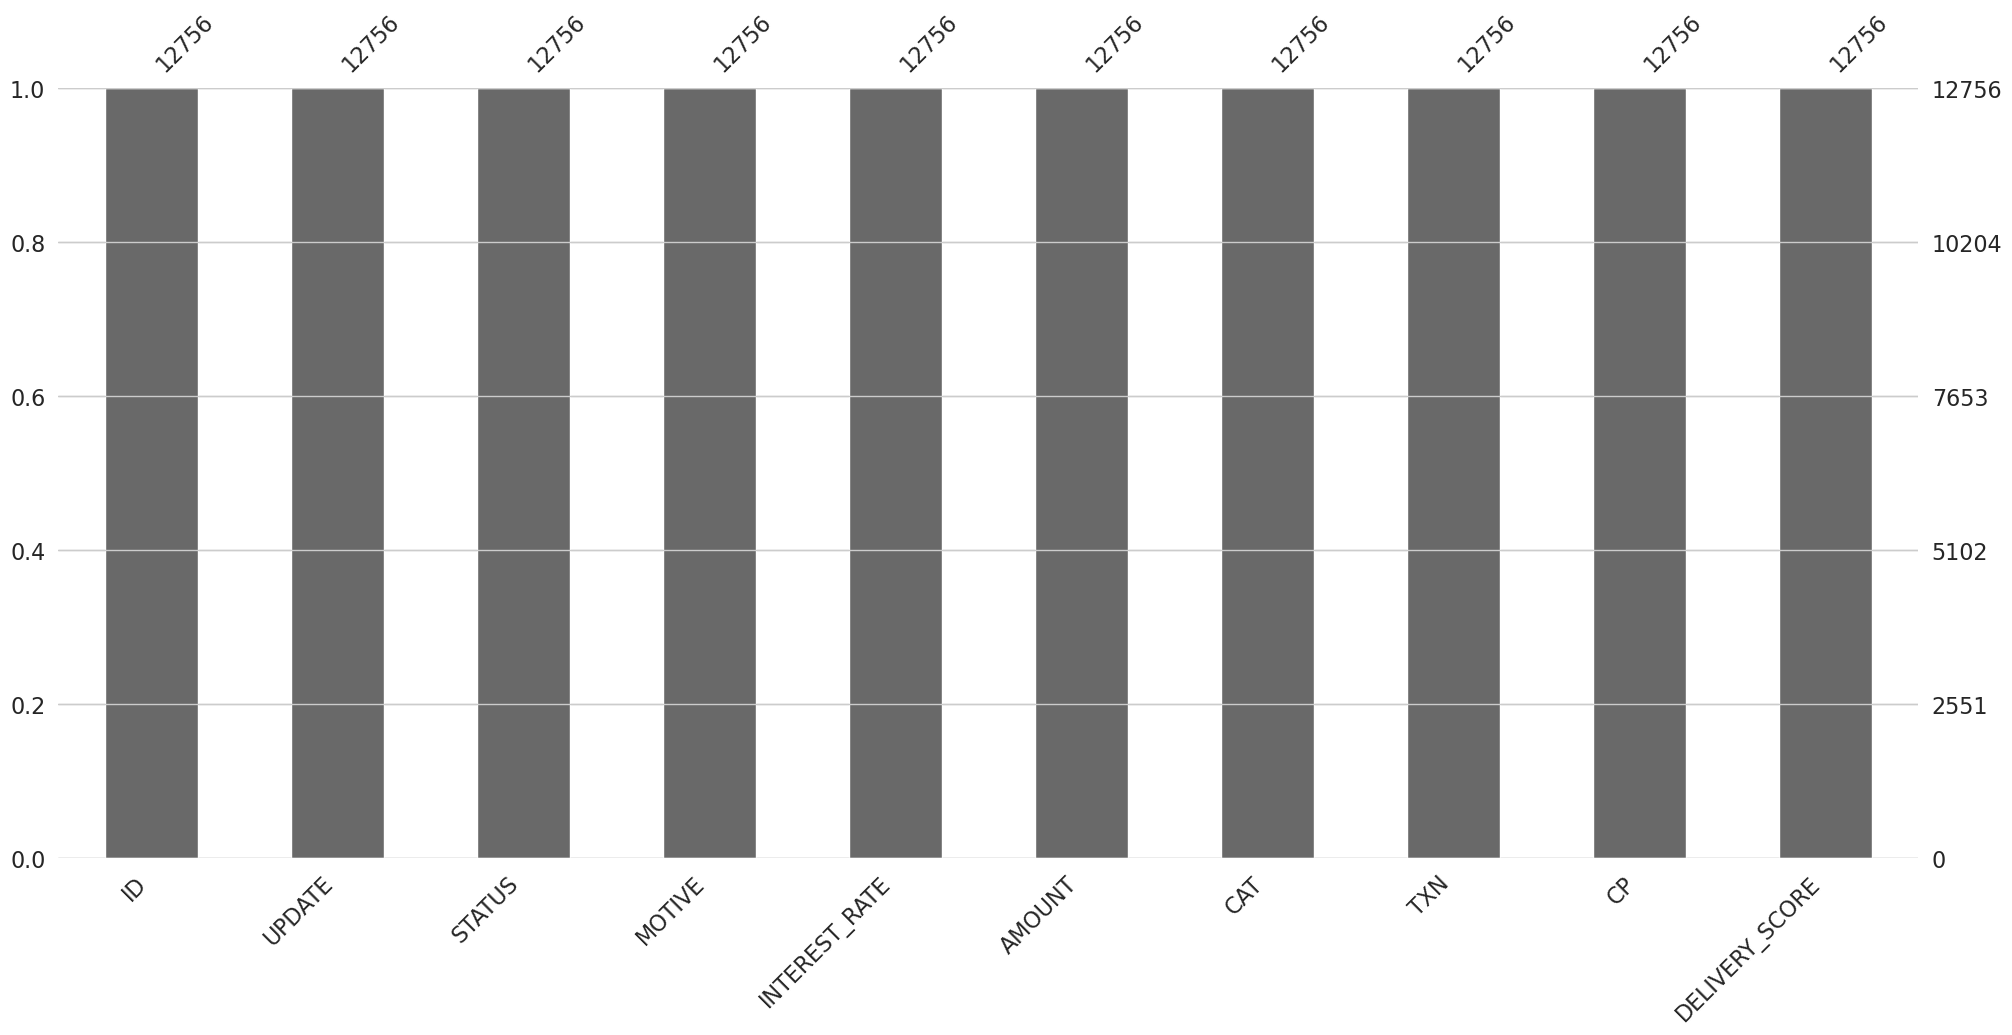

In [515]:
missingno.bar(df=df);

### Guardando al data en la carpeta correspondiente 

In [521]:
df.to_csv('/home/astin/Documents/MypythonBriefcase/visual/job_test/BI_analyst/data/processed/clean_data.csv', index= None)

### Cambiando el tipo de datos 

In [512]:
df['UPDATE'] = pd.to_timedelta(df['UPDATE'],errors='ignore')
# EL parametro errors permita elgir la forma en la cual manejamos los errores

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              12756 non-null  int64  
 1   UPDATE          12756 non-null  object 
 2   STATUS          12756 non-null  object 
 3   MOTIVE          12756 non-null  object 
 4   INTEREST_RATE   12756 non-null  float64
 5   AMOUNT          12756 non-null  float64
 6   CAT             12756 non-null  float64
 7   TXN             12756 non-null  float64
 8   CP              12756 non-null  float64
 9   DELIVERY_SCORE  12756 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 996.7+ KB


### Planteamito de la pregunta de negocio

#### Como optimizar el  embudo de conversión de negocios de tarjetas de crédito.

### Anlisis univarido EDA

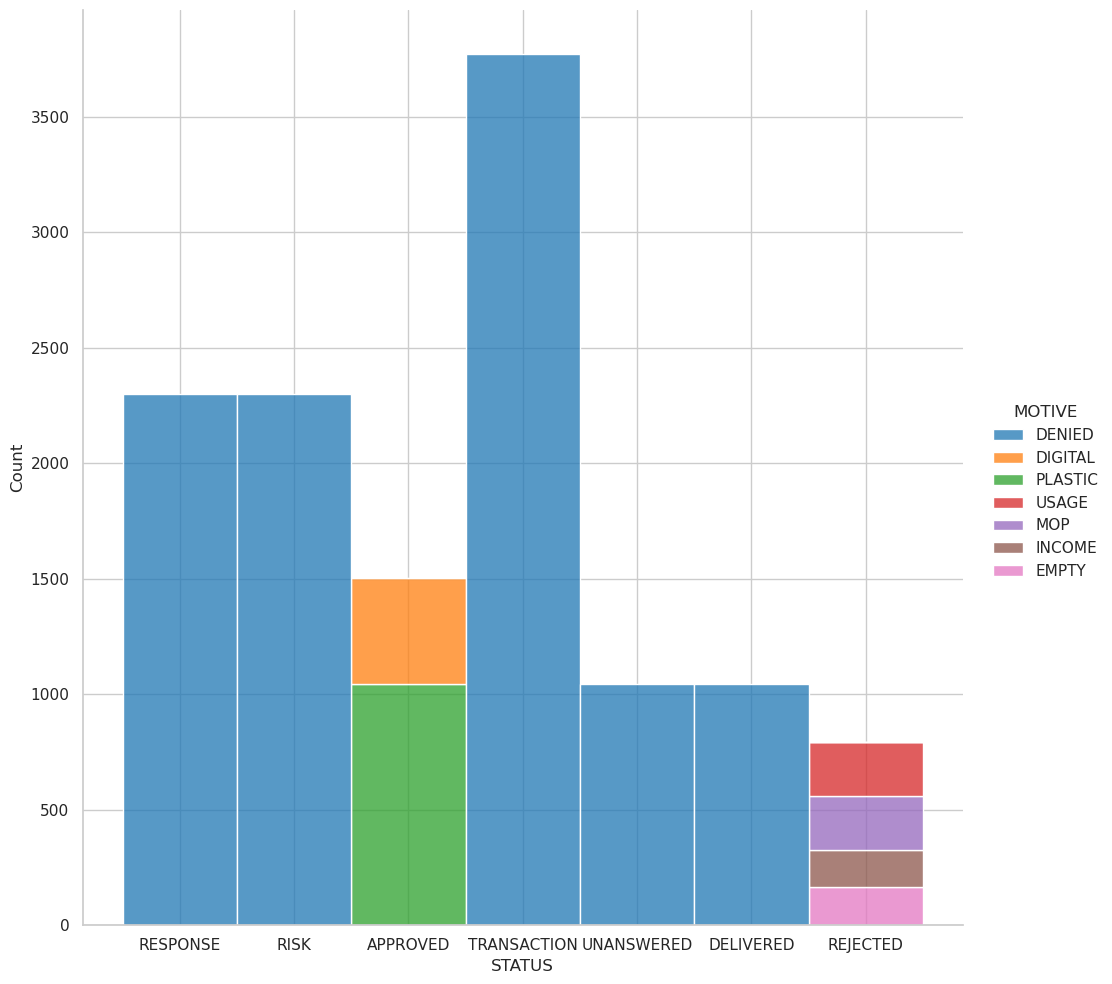

In [547]:
sns.displot(
    data= df,
    x= df.STATUS,
    height=10,
    hue= df.MOTIVE,
    multiple='stack'
    
);

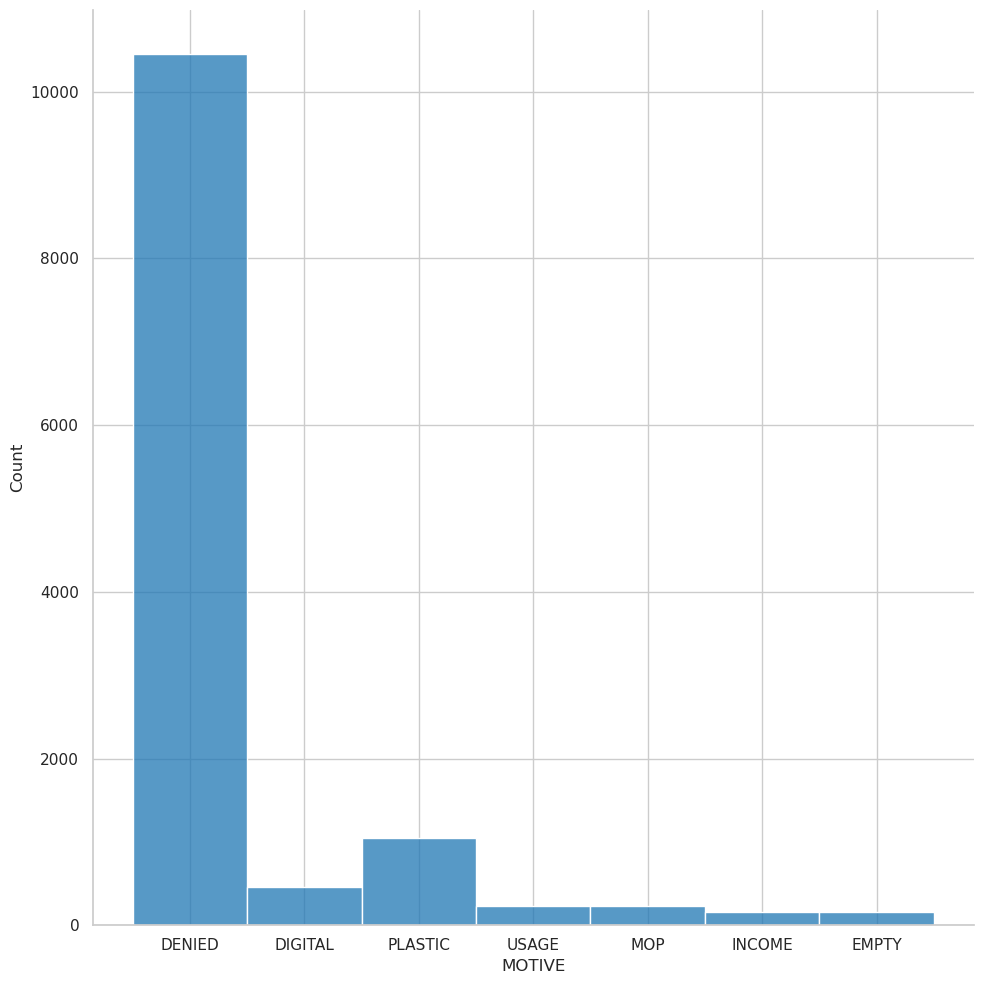

In [548]:
sns.displot(
    data= df,
    x= df.MOTIVE,
    height=10,
    # hue= df.MOTIVE,
    multiple='stack'
    
);

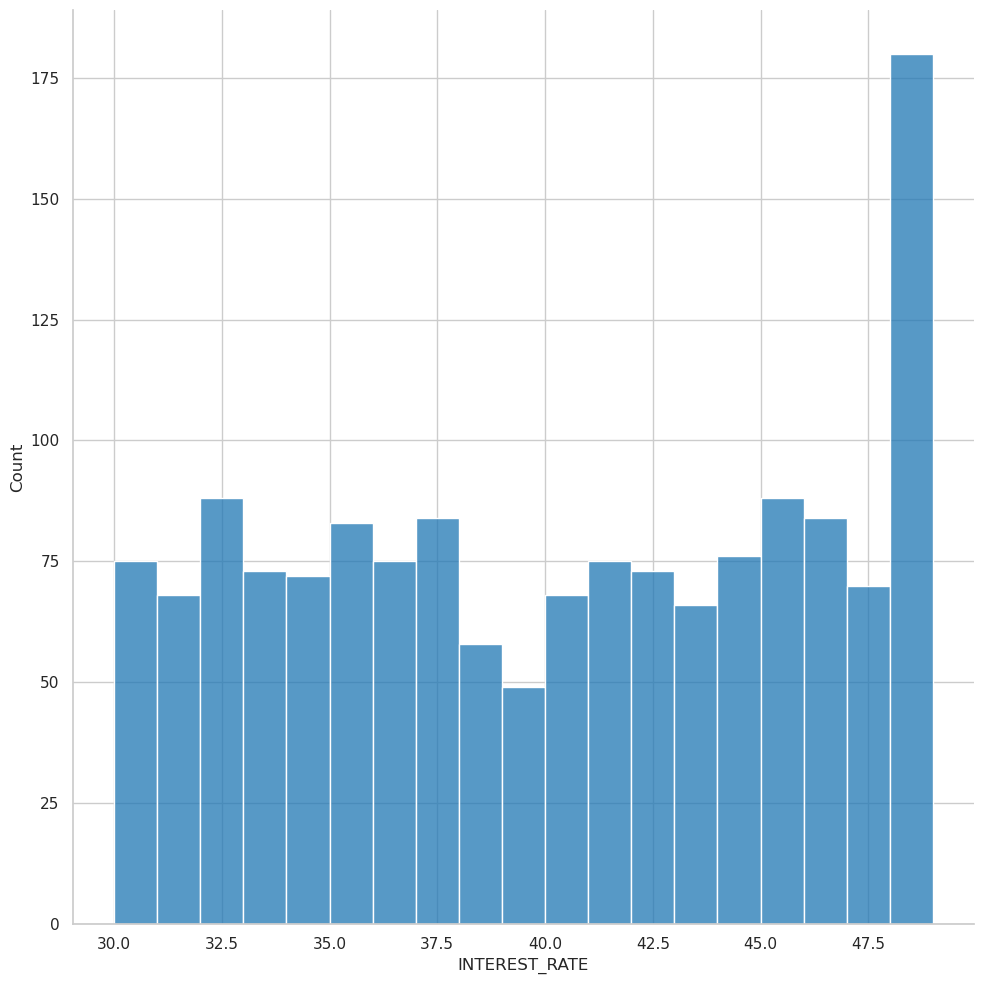

In [776]:
x =df.loc[df["INTEREST_RATE"]>1]
x = pd.Series(x.INTEREST_RATE)

sns.displot(
    data= x,
    x=x,
    height=10,
    multiple='stack',
    binwidth=1,
    
    
    
);

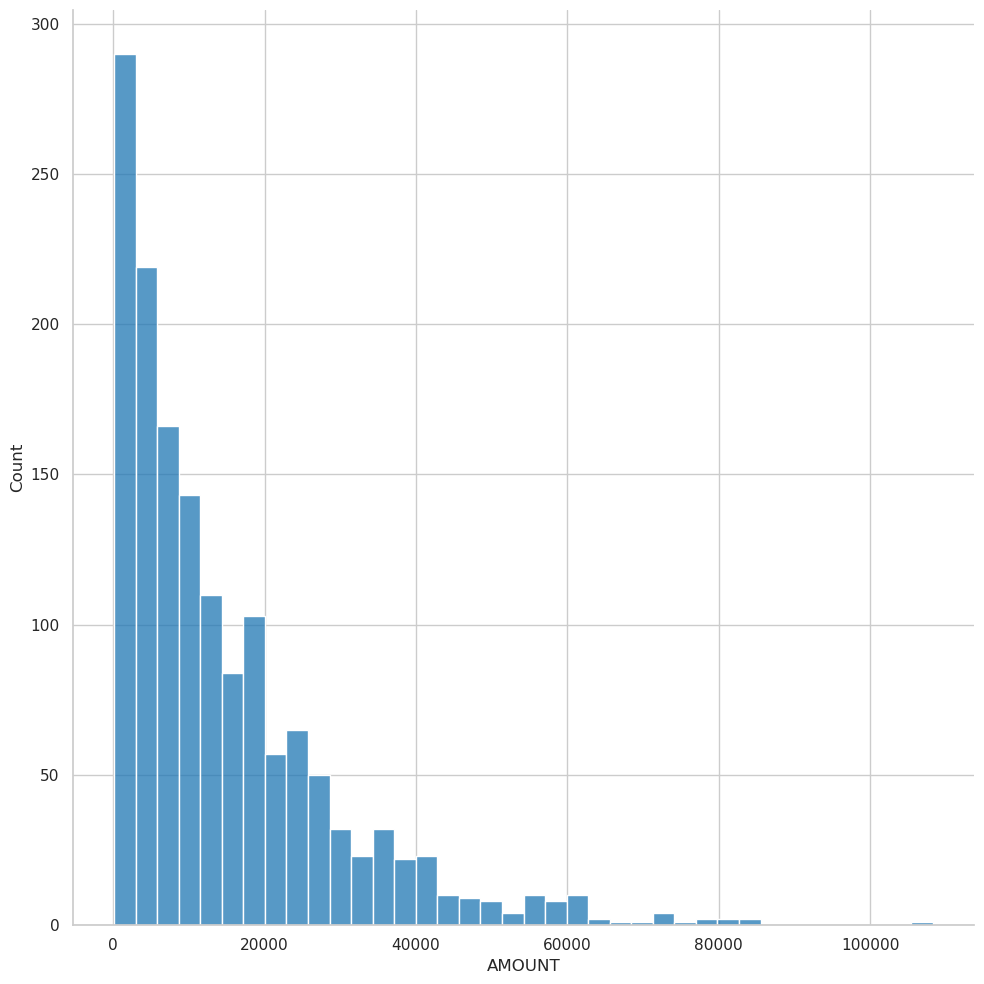

In [892]:

x =df.loc[df["AMOUNT"]>1]
x = pd.Series(x.AMOUNT)

sns.displot(
    data= x,
    x=x,
    height=10,
    multiple='stack',
    # binwidth=1
    
    
);

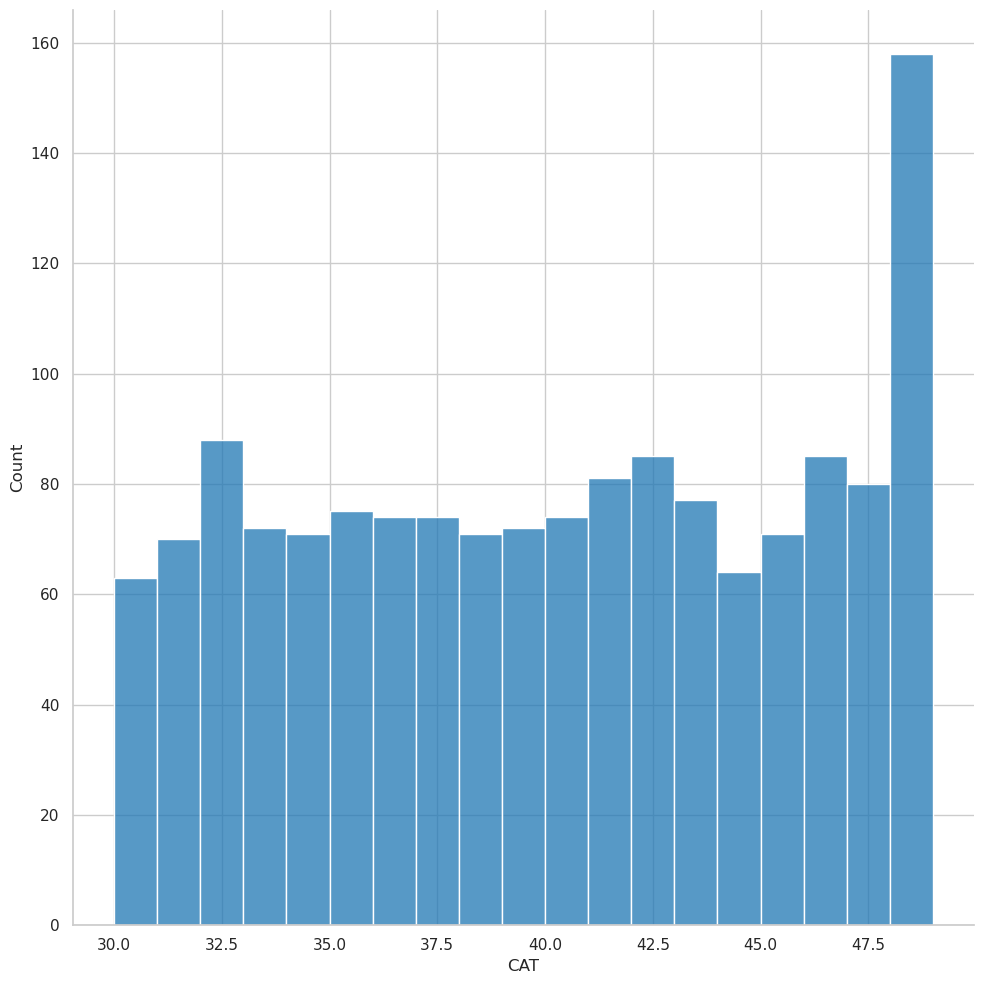

In [623]:
x =df.loc[df["CAT"]>1]
x = pd.Series(x.CAT)

sns.displot(
    data= x,
    x=x,
    height=10,
    multiple='stack',
    binwidth=1
    
    
);

In [819]:
q1 = df['TXN'].quantile(0.25)
q3 = df['TXN'].quantile(0.75)

IQR = q3 - q1

txn_lower = q1 - 1.5*IQR
txn_upper = q3 + 1.5*IQR

df_txn_sin_outliers = df.loc[(df['TXN'] >= txn_lower) & (df['TXN'] <= txn_upper)]

df_txn_sin_outliers= df_txn_sin_outliers[df_txn_sin_outliers.TXN >1]

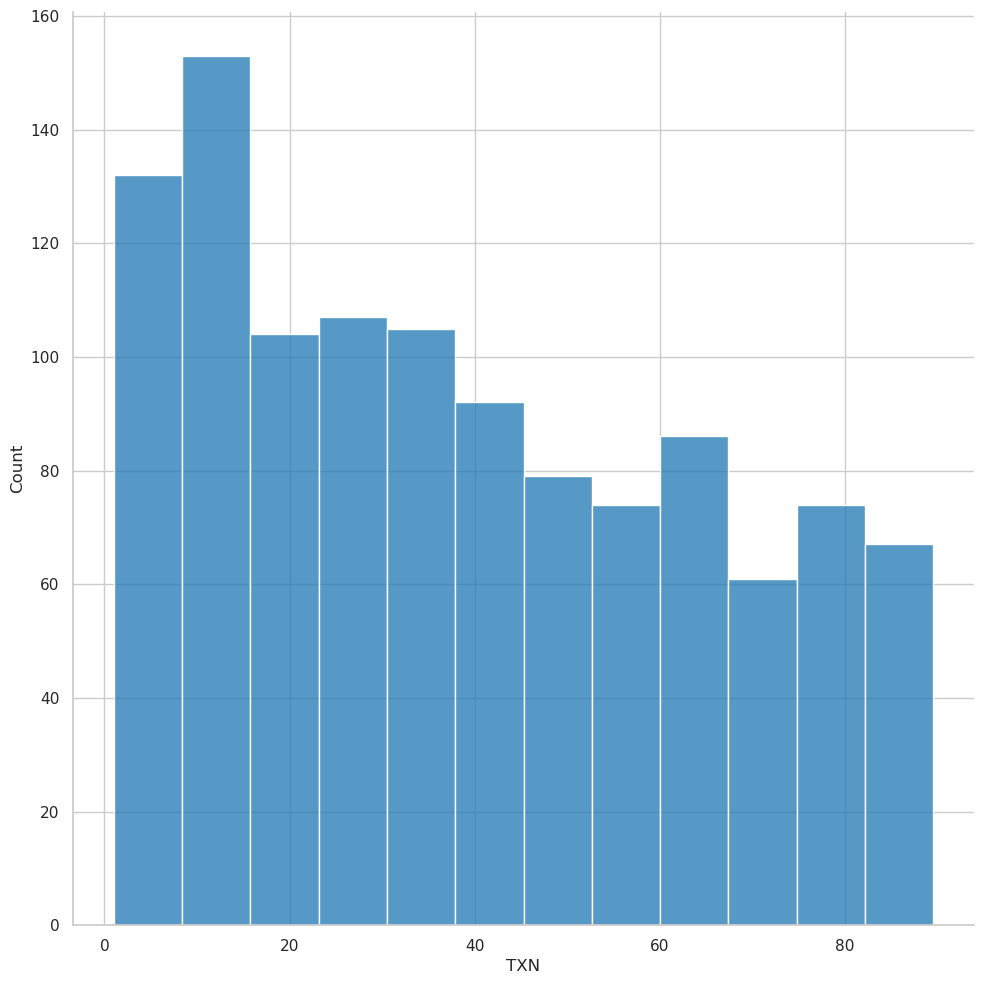

In [753]:
sns.displot(
    data= df_txn_sin_outliers,
    x='TXN',
    height=10,
    # multiple='stack',
    # binwidth=10000
    
    
);

<AxesSubplot:xlabel='TXN'>

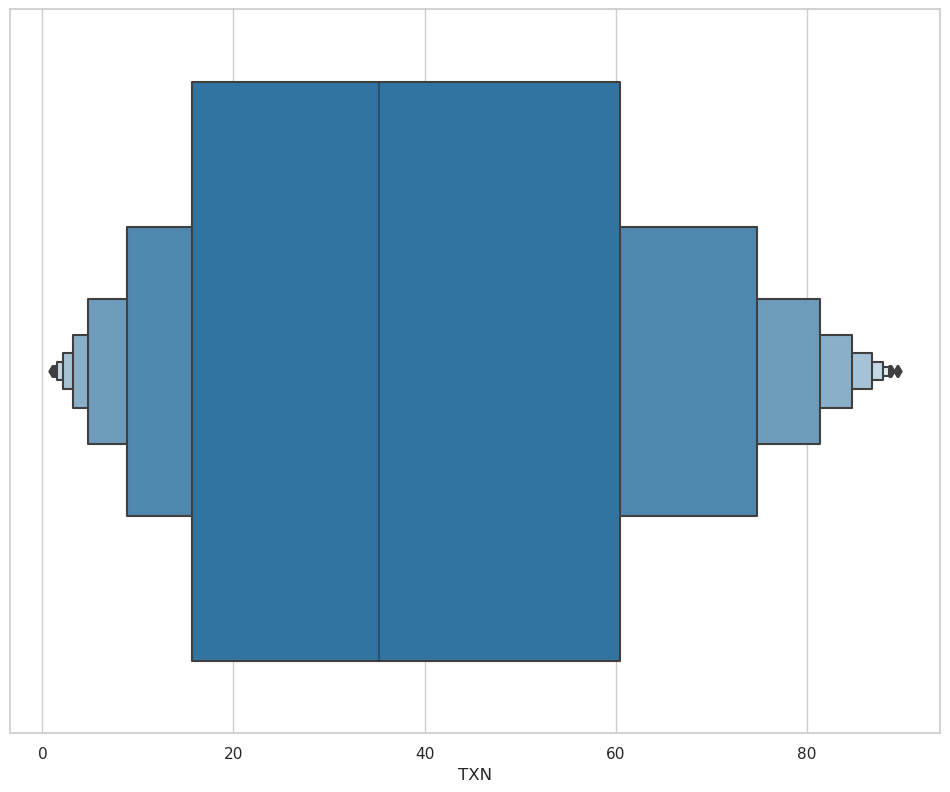

In [746]:
sns.boxenplot(
    data=df_txn_sin_outliers,
    x='TXN'
)

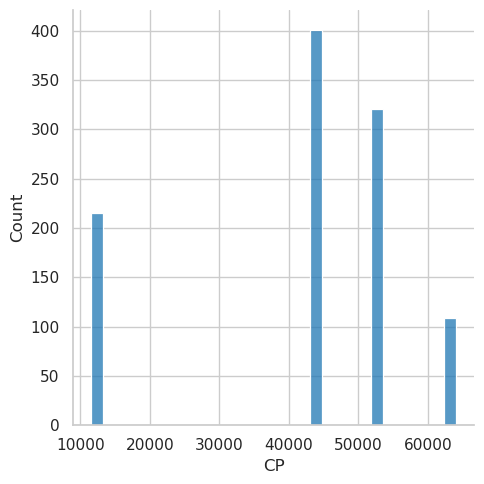

In [863]:
sns.displot(
    data= df[df['CP']>1]['CP'],
    x=df[df['CP']>1]['CP']
);

<AxesSubplot:xlabel='CP'>

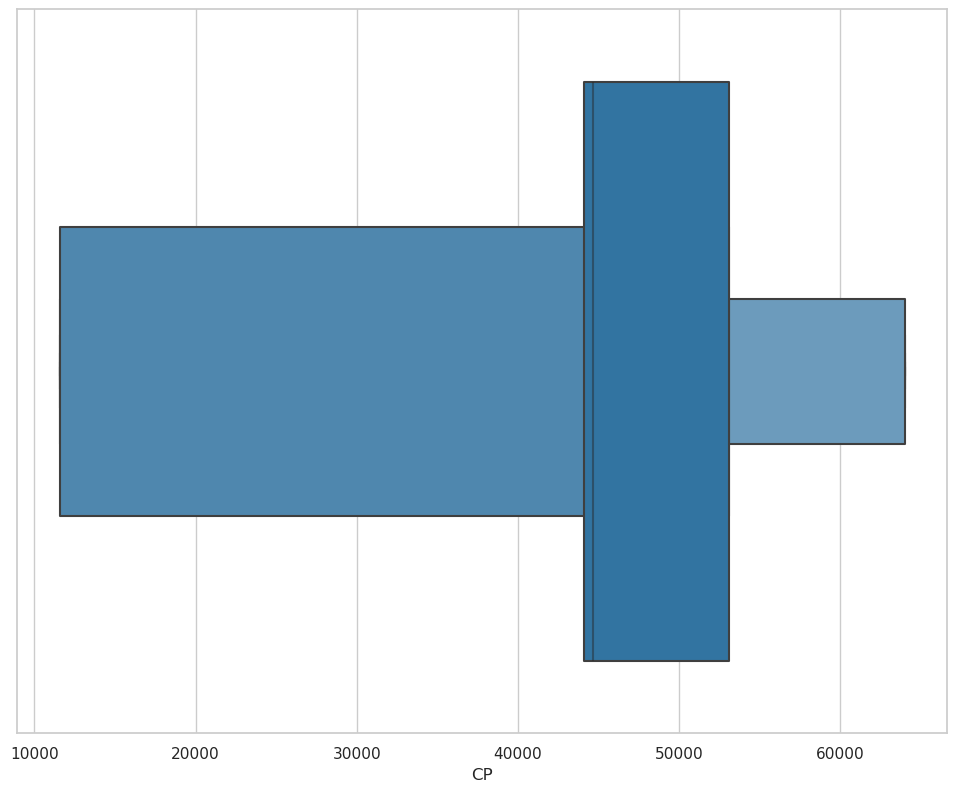

In [861]:
sns.boxenplot(
    data= df[df['CP']>1]['CP'],
    x=df[df['CP']>1]['CP']
)

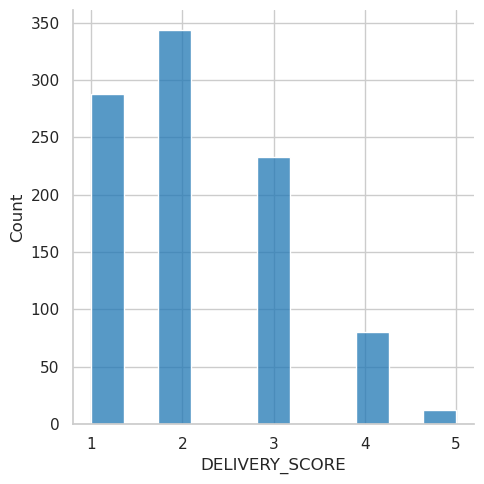

In [902]:
sns.displot(
    data =df[df['DELIVERY_SCORE']>=1]['DELIVERY_SCORE'],
    x= df[df['DELIVERY_SCORE']>=1]['DELIVERY_SCORE']
);

In [893]:
df

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,DENIED,0.0,0.0,0.0,0.000000,0.0,0.0
1,1,46:41.4,RISK,DENIED,0.0,0.0,0.0,0.000000,0.0,0.0
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,0.000000,0.0,0.0
3,1,08:23.4,TRANSACTION,DENIED,0.0,0.0,0.0,434.112066,0.0,0.0
4,2,00:00.0,UNANSWERED,DENIED,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12751,4999,07:42.2,TRANSACTION,DENIED,0.0,0.0,0.0,31.104808,0.0,0.0
12752,4999,40:29.5,TRANSACTION,DENIED,0.0,0.0,0.0,74.732791,0.0,0.0
12753,4999,22:31.7,TRANSACTION,DENIED,0.0,0.0,0.0,35774.172720,0.0,0.0
12754,4999,27:19.8,TRANSACTION,DENIED,0.0,0.0,0.0,79.866598,0.0,0.0


### Analisis de 2 variables  

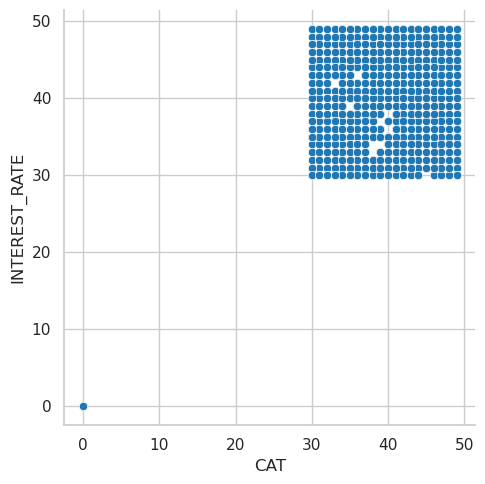

In [915]:
sns.relplot(
    data= df,
    x='CAT',
    y='INTEREST_RATE',

)

In [911]:
df.corr()

,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
ID,1.000000,-0.008108,-0.007245,-0.009953,0.007820,-0.000492,-0.006410
INTEREST_RATE,-0.008108,1.000000,0.671958,0.976279,-0.038805,-0.099771,-0.092854
AMOUNT,-0.007245,0.671958,1.000000,0.672044,-0.026863,-0.069068,-0.064279
CAT,-0.009953,0.976279,0.672044,1.000000,-0.038832,-0.099840,-0.092918
TXN,0.007820,-0.038805,-0.026863,-0.038832,1.000000,-0.029674,-0.027616
CP,-0.000492,-0.099771,-0.069068,-0.099840,-0.029674,1.000000,0.799991
DELIVERY_SCORE,-0.006410,-0.092854,-0.064279,-0.092918,-0.027616,0.799991,1.000000


In [909]:
sns.heatmap(
    data =df.columns('STATUS','MOTIVE',	'INTEREST_RATE','AMOUNT','CAT',	'TXN',	'CP','DELIVERY_SCORE')
)

TypeError: 'Index' object is not callable